<h1><center>LOG6953C - TP3</center></h1>

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
# import basic plot tools
from qiskit.visualization import plot_histogram
import re

Question 1

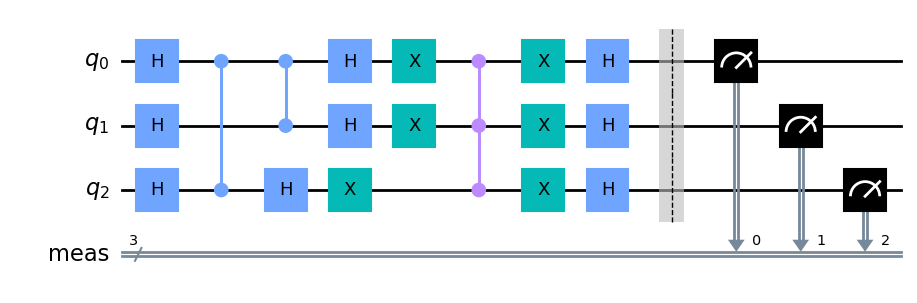

In [30]:
grover_circuit = QuantumCircuit(3)
# grover_circuit = initialize_s(grover_circuit, [0,1,2])
for q in [0, 1, 2]:
    grover_circuit.h(q)
grover_circuit.cz(2, 0)
grover_circuit.cz(1, 0)

for qubit in range(3):
    grover_circuit.h(qubit)
# Apply transformation |00..0> -> |11..1> (X-gates)
for qubit in range(3):
    grover_circuit.x(qubit)
# Do multi-controlled-Z gate
grover_circuit.ccz(2, 1, 0)
# Apply transformation |11..1> -> |00..0>
for qubit in range(3):
    grover_circuit.x(qubit)
# Apply transformation |00..0> -> |s>
for qubit in range(3):
    grover_circuit.h(qubit)

grover_circuit.measure_all()
grover_circuit.draw(output='mpl')

In [31]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-03-21 15:02:25,988: Credentials are already in use. The existing account in the session will be replaced.


/Users/adam/Documents/Cours/5eme Annee/2eme Session/LOG6953C/LOG6953C_TPs/TP3/env/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/adam/Documents/Cours/5eme Annee/2eme Session/LOG6953C/LOG6953C_TPs/TP3/env/lib/python3.9/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


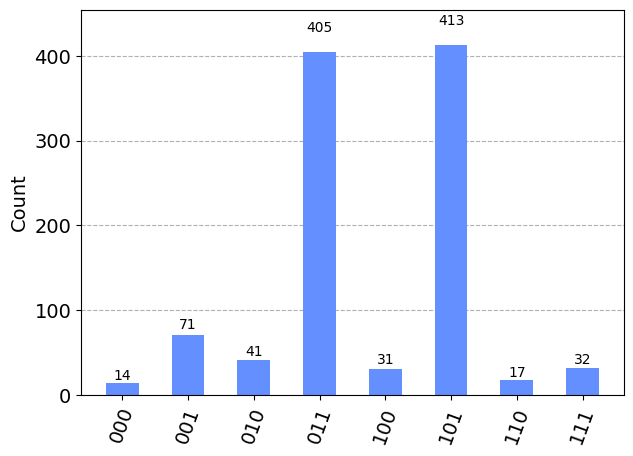

In [32]:
# Run 3 qubit Grover on Fake Nairobi noisy simulator
from qiskit import execute
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeNairobi
device_backend = FakeNairobi()
sim_nairo = AerSimulator.from_backend(device_backend)
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(grover_circuit, sim_nairo, optimization_level=3)
job=execute(grover_circuit, sim_nairo, shots=1024)
# Get the results from the computation,
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

Quetion 2

In [26]:
def cz_to_hcnoth(codeline: str, number: int):
    if re.search('prog.cz', codeline) is not None:
        new_codeline = re.sub("# number=(.*)[\n]", "", codeline)
        return re.sub('cz[(](.*)[,]', "h(", new_codeline) + "# number=" + str(number) + "\n" + \
            re.sub('cz', "cx", new_codeline) + "# number=" + str(number + 1) + "\n" + \
            re.sub('cz[(](.*)[,]', "h(", new_codeline) + "# number=" + str(number + 2) + "\n"
    else:
        raise Exception('No CZ gate for CNOT transformation')

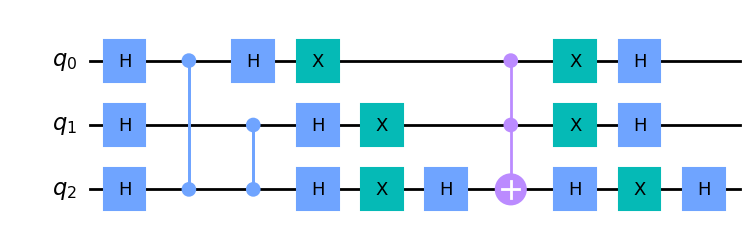

In [27]:
from gates_equivalent import cz_to_hcnoth

circuit = '''n = 3
prog = QuantumCircuit(n)
for q in [0,1,2]:
    prog.h(q)
prog.cz(0, 2)
prog.cz(1, 2)
for qubit in range(n):
    prog.h(qubit)
for qubit in range(n):
    prog.x(qubit)
prog.h(n-1)
prog.mct(list(range(n-1)), n-1)
prog.h(n-1)
for qubit in range(n):
    prog.x(qubit)
for qubit in range(n):
    prog.h(qubit)
    '''
exec(circuit)
prog.draw(output='mpl')

# print(cz_to_hcnoth(circuit, 0))

In [28]:
search_sequence = 'prog.cz'

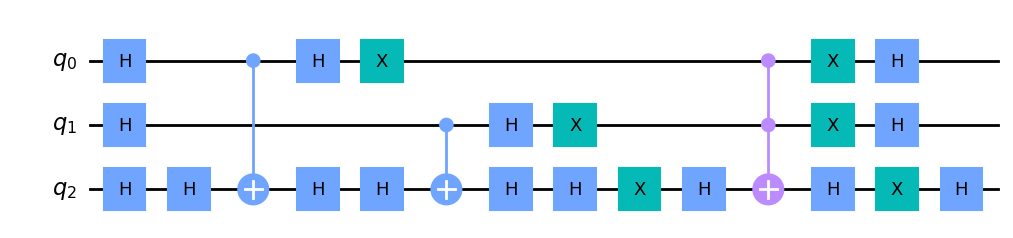

In [29]:
lines = circuit.splitlines()
mutant = ""
for i, line in enumerate(lines):
    if search_sequence in line:
        mutant += '\n' + cz_to_hcnoth(line, i)
    else:
        mutant += '\n' + line
exec(mutant)
prog.draw(output='mpl')